In [1]:
import nltk
import numpy as np
from string import punctuation
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('stopwords')
from google.colab import drive
!pip install pymorphy2
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
drive.mount('/content/drive')
nltk.download("punkt")
nltk.download("wordnet")
FILE="/content/drive/Shareddrives/Campus_K5/k5f4_team200/kinopoisk-top250.csv"
# стоп слов не хватало, поэтому пришлось добавить
delete = stopwords.words('russian')
delete += ['её','которых','той','тот','либо','который','что','он','-','»','«','—','_','~','это','эта','кто','в','эти','их','так','к','как','себе','они','но','ним','оно','так','есть','лишь',',','.',';','и','под','с','до']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 8.2MB 7.5MB/s 
Mounted at /content/drive
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
# удаление лишни столбцов и считывание .csv файла
DATA=pd.read_csv(FILE)
DATA = DATA.drop([ 'movie', 'year','url_logo'],axis=1)

In [10]:
new_overview=DATA['actors']+DATA['overview']+DATA['screenwriter']

In [11]:
# токенизирует столбик с аннотацией
def tt(tit, wt):
  return word_tokenize(tit)

DATA['tikenized_new_overview'] = new_overview.apply(lambda x: tt(x, word_tokenize))
DATA['tikenized_new_overview'] = new_overview.apply(word_tokenize)

In [12]:
# оставил на случай болле серьезной обработки
def stemming(titl, delete):
  return [delete.stem(word) for word in titl]

In [13]:
# удаление знаков пунктуации
# apply-применяет функцию к каждому значению столбца
punctuation = list(punctuation)
def fp(x):
  elements = [element if element not in punctuation else ' ' for element  in x]
  return ''.join(elements)
DATA['fp'] = new_overview.apply(fp)

In [14]:
!pip install pymorphy2
import pymorphy2

In [17]:
# лемматизируем токенезированный столбец
lem=pymorphy2.MorphAnalyzer()
def lemmatize(tt, lem):
  return [lem.parse(i)[0].normalized.word for i in tt]
DATA['lemmatized_new_overview'] = DATA['tikenized_new_overview'].apply(lambda x: lemmatize(x, lem))

In [16]:
!pip install pyLDAvis
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import multiprocessing
from sklearn.decomposition import LatentDirichletAllocation
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from PIL import Image
from sklearn.manifold import TSNE
import multiprocessing
from sklearn.decomposition import LatentDirichletAllocation
%matplotlib inline

     |████████████████████████████████| 1.7MB 7.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 36.1MB/s 
     |████████████████████████████████| 15.7MB 198kB/s 
ERROR: Operation cancelled by user


ModuleNotFoundError: ignored

In [ ]:
# далее идет обучение с учителем
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
y=DATA['rating_ball']
x=DATA['lemmatized_new_overview']
# объединяет список списков в один список
def f_p(x):
  elements = [element for element  in x]
  return ' '.join(elements)
x = x.apply(f_p)
# переводим строковой X в векторный вид
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(x)

In [ ]:
# разбиваем X и y на тренировочные и тестовые данные
#test_size- выделяет для тестового набора 30%
# Суть параметра random_state (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях. 
# Т.е. если явно задать значение random_state отличным от None - то генерируемые псевдослучайные величины будут иметь одни и те же значения при каждом вызове.
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,random_state=17)

In [ ]:
# проверяем точность рандомного дерева
# max_depth-максимальная шлубина дерева
# predict-передает на предсказание тестовый X_holdout
regr_tree = DecisionTreeRegressor(max_depth=5,random_state=17).fit(X_train,y_train)
pred = regr_tree.predict(X_holdout)
mean_absolute_error(y_holdout, pred)

0.1955598353909471

In [ ]:
# среднее значение по рейтингу
# mean-среднее значение по рейтингу
averege=DATA['rating_ball'].mean()
averege_pred = [averege]*len(y_holdout)
mean_absolute_error(y_holdout, averege_pred)

0.18071696000000093

In [ ]:
# попробовать
# TfIdf
# min_df = 1
# RandomForesRegressor 
# CatBoostRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
dataf="/content/drive/My Drive/Test.xlsx"
dataf=pd.read_excel(dataf)
new_data=dataf['overview']+' '+dataf['actors']+' '+dataf['screenwriter']

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#использование других данных для теста (самый лучший день)
# array([8.19314198]),в то время как реальный балл фильма 4.6
tok_dataf = new_data.apply(lambda x: tt(x, word_tokenize))
tok_dataf = new_data.apply(word_tokenize)
lem_dataf= tok_dataf.apply(lambda x: lemmatize(x, lem))
x1=lem_dataf.apply(f_p)
X1=vectorizer.transform(x1)
regr_tree.predict(X1)

array([8.19314198])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<BarContainer object of 10 artists>

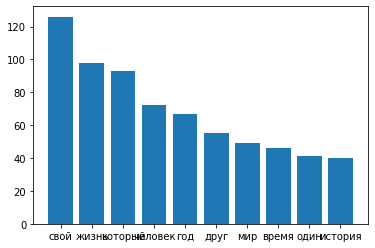

In [ ]:
#часто встречающиеся слова
import itertools
import operator
from nltk.corpus import stopwords
delete = stopwords.words('russian')
delete += ['её','которых','той','тот','либо','который','что','он','-',':','»','«','—','_','~','это','эта','кто','в','эти','их','так','к','как','себе','они','но','ним','оно','так','есть','лишь',',','.',';','и','под','с','до']
morpheus = pymorphy2.MorphAnalyzer()
data_frame = pd.read_csv(FILE_PATH)
data_frame = data_frame[['movie', 'year', 'country', 'rating_ball', 'overview', 'director', 'screenwriter', 'actors']]
data_frame.head(3)
def sum_dicts(d1,d2):
    k=set(list(d1.keys())+list(d2.keys()))
    d={}
    for a in k:
        v1=d1.get(a)
        v2=d2.get(a)
        if v1==None:
            v=v2
        elif v2==None:
            v=v1
        else:
            v=v1+v2
        d[a]=v
    return d
overviews = data_frame['overview']
data_frame["settings"] = ""
string = 0
global_counter = {}
for sample in overviews:
  counter = {}
  for word in word_tokenize(sample, language = "russian"):
    word = word.lower()
    if word[-1] == "…":
      word = word[:-1]
    if word not in delete:
      word = morpheus.parse(word)[0].normalized.word
      if word in counter:
        counter[word] += 1
      else:
        counter[word] = 1
  data_frame["settings"][string] = counter
  string += 1
  global_counter = sum_dicts(global_counter, counter)
global_counter_sorted = dict(sorted(  global_counter.items(),
                            key=operator.itemgetter(1),
                            reverse=True))
first_n = dict(itertools.islice(global_counter_sorted.items(), 10))
width=12
height=12
plt.bar(*zip(*first_n.items()))
#plt.subplots(figsize=(width, height)) # задать высоту и ширину графика